<a href="https://colab.research.google.com/github/botronico/StabilityImageGenerator/blob/main/StabilityAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Show available engines


import requests

# API key and endpoint
api_key = "sk-PiHlK8V72FmiNEa1K1LP1HyJseMFs9KHXM5k8KSjNFvyKSjP"
url = "https://api.stability.ai/v1beta/engines/list"

headers = {
    "Authorization": f"Bearer {api_key}",
}

# Fetch the list of available engines
response = requests.get(url, headers=headers)

if response.status_code == 200:
    engines = response.json()  # This should return a list
    print("Available Engines:")
    for engine in engines:  # Loop through the list directly
        print(f"ID: {engine['id']}, Name: {engine['name']}")
else:
    print(f"Error: {response.status_code}, {response.text}")


Available Engines:
ID: esrgan-v1-x2plus, Name: Real-ESRGAN x2
ID: stable-diffusion-xl-1024-v0-9, Name: Stable Diffusion XL v0.9
ID: stable-diffusion-xl-1024-v1-0, Name: Stable Diffusion XL v1.0
ID: stable-diffusion-v1-6, Name: Stable Diffusion v1.6
ID: stable-diffusion-512-v2-1, Name: Stable Diffusion v2.1
ID: stable-diffusion-xl-beta-v2-2-2, Name: Stable Diffusion v2.2.2-XL Beta


Describe the image: A serene, misty forest at dawn, with towering, ancient oak trees whose branches are draped in moss. The soft morning light filters through the dense canopy, casting golden beams across the forest floor, which is covered in a blanket of vibrant green ferns and fallen leaves. A crystal-clear stream winds gently through the forest, its surface reflecting the surrounding trees and the soft pink and orange hues of the early morning sky. Birds are perched on the branches, their songs filling the crisp, cool air, while a family of deer grazes near the water’s edge, their soft fur glistening with dew. In the background, distant mountains rise majestically, their peaks still shrouded in low-hanging clouds. The atmosphere is calm and peaceful, with the fresh scent of pine and earth filling the air, evoking a sense of untouched wilderness.


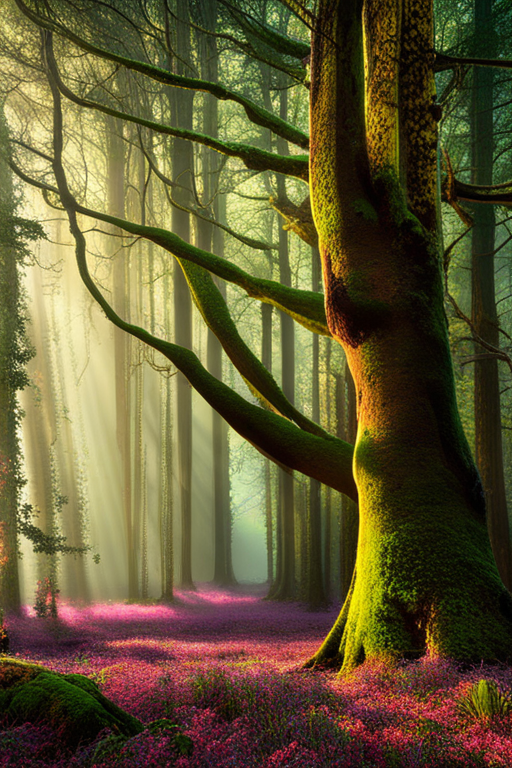

Image generated and saved as 'generated_image.png'


In [18]:
import requests
from PIL import Image
from io import BytesIO
import base64

# Step 1: Define your API key and the stable endpoint
api_key = "sk-PiHlK8V72FmiNEa1K1LP1HyJseMFs9KHXM5k8KSjNFvyKSjP"
url = "https://api.stability.ai/v1/generation/stable-diffusion-xl-beta-v2-2-2/text-to-image"

# Step 2: Set up the headers for the request
headers = {
    "Authorization": f"Bearer {api_key}",
    "Content-Type": "application/json",
}

# Function to generate image from a text prompt using Stable Diffusion v2.2.2-XL Beta
def generate_image(prompt, width=512, height=768, steps=30, cfg_scale=7.5):
    payload = {
        "text_prompts": [{"text": prompt}],
        "cfg_scale": cfg_scale,
        "height": height,
        "width": width,
        "samples": 1,
        "steps": steps,
    }

    response = requests.post(url, json=payload, headers=headers)

    if response.status_code == 200:
        # Decode the base64-encoded image and display it
        data = response.json()
        image_data = data['artifacts'][0]['base64']
        image = Image.open(BytesIO(base64.b64decode(image_data)))

        # Show the image
        display(image)

        # Save the image locally
        image.save("generated_image.png")
        print("Image generated and saved as 'generated_image.png'")
    else:
        print(f"Error: {response.status_code}, {response.text}")

# Step 3: Ask the user for a prompt
prompt = input("Describe the image: ")

# Step 4: Generate the image with the user-provided prompt
generate_image(prompt, width=512, height=768)
